# Anomaly Detection in Credit Card Transactions (Group D)

Group D members :

1) CHAD T CHIU    

2) SATYA SHIVA SAI RAM KAMMA   

3) GURNIT S CHAUHAN     

4) TANUSH BHASKAR SHETTY

## Introduction

This project explores anomaly detection techniques to identify fraudulent credit card transactions. The dataset is highly imbalanced, with fraudulent transactions comprising only a small fraction of the total. The objective is to detect anomalies with high recall while minimizing false positives.

We evaluated the following machine learning techniques:
1. **Gaussian mixture model**
2. **PCA**
3. **Isolation Forest**
4. **Random Forest with Balanced Class Weights**

Our goal is to identify the best model for detecting anomalies in this dataset while maintaining a balance between precision and recall.

Dataset used : https://www.kaggle.com/shayannaveed/credit-card-fraud-detection
  

# 1. Dataset Loading


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

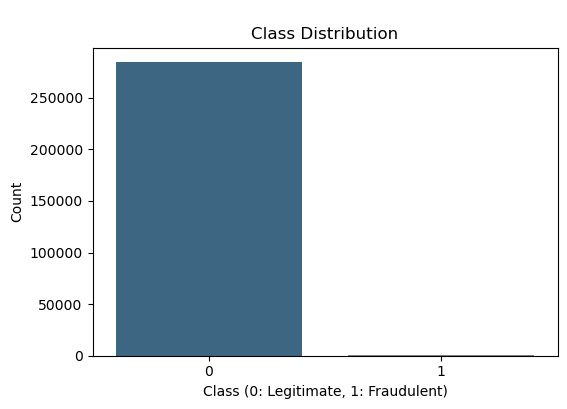

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('C:/Users/tanus/Downloads/ML_project/creditcard.csv')

# Display dataset information
print("Dataset Information:")
data.info()

# Display the first few rows
data.head()

# Check class distribution
class_counts = data['Class'].value_counts()
print("\nClass Distribution:\n", class_counts)

# Analyze class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=data, palette="viridis")
plt.title("\nClass Distribution")
plt.xlabel("Class (0: Legitimate, 1: Fraudulent)")
plt.ylabel("Count")
plt.show()

# 2. Data Cleaning

In [ ]:
# Basic dataset information
print("Dataset Info:\n")
print(data.info())

# Check for missing values
missing_values = data.isnull().sum().sum()
print(f"Missing Values: {missing_values}")

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


Data shape after removing duplicates: (283726, 31)
                Time         Amount
count  283726.000000  283726.000000
mean    94811.077600      88.472687
std     47481.047891     250.399437
min         0.000000       0.000000
25%     54204.750000       5.600000
50%     84692.500000      22.000000
75%    139298.000000      77.510000
max    172792.000000   25691.160000


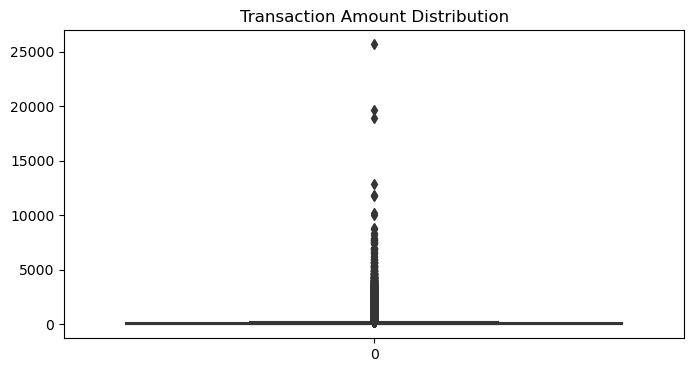

In [ ]:
# Remove duplicate rows
data = data.drop_duplicates()
print(f"Data shape after removing duplicates: {data.shape}")

# Summary of the 'Amount' and 'Time' columns
print(data[['Time', 'Amount']].describe())

# Visualize the 'Amount' column
plt.figure(figsize=(8, 4))
sns.boxplot(data['Amount'], palette="viridis")
plt.title("Transaction Amount Distribution")
plt.show()

<b> We loaded the Credit Card Fraud Detection dataset and examined its structure: </b>
<ul>
<li>Rows and Columns: 284,807 rows and 31 columns.</li>
<li>Key Features:</li>
<li>Time: Seconds elapsed between each transaction and the first transaction.</li>
<li>Amount: Transaction amount.</li>
<li>Class: Target variable (0 = Non-Fraud, 1 = Fraud).</li>
<li>Duplicates: Found and removed 1,081 duplicate rows.</li>
<li>New Shape: 283,726 rows and 31 columns.</li>
<li>Missing Values: None detected, so no imputation was required.</li>

# 3. Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale 'Time' and 'Amount'
scaler = StandardScaler()
data[["Time", "Amount"]] = scaler.fit_transform(data[["Time", "Amount"]])

# Separate features and target
X = data.drop(columns=["Class"], axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes of training and testing sets
print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



Training data shape: (226980, 30)
Testing data shape: (56746, 30)


<b>To ensure features were on the same scale, we standardized the Time and Amount columns using StandardScaler:</b>

<li>Mean and standard deviation were set to 0 and 1, respectively. </li>
<li>This step improves model performance, especially for algorithms like SVM or PCA. </li>

<b>The dataset had a severe class imbalance:</b>

Before Balancing:
<li>Class 0 (Non-Fraud): 283,253 (~99.83%).</li>
<li>Class 1 (Fraud): 473 (~0.17%).</li>
<li>This imbalance required handling to ensure the model could effectively detect fraud cases.</li>


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Check initial class distribution
print("Original class distribution:\n", y_train.value_counts())

# Apply SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Verify class distribution after SMOTE
print("Class distribution after SMOTE:\n", y_train_sm.value_counts())

Original class distribution:
 0    198277
1       331
Name: Class, dtype: int64
Class distribution after SMOTE:
 0    198277
1    198277
Name: Class, dtype: int64


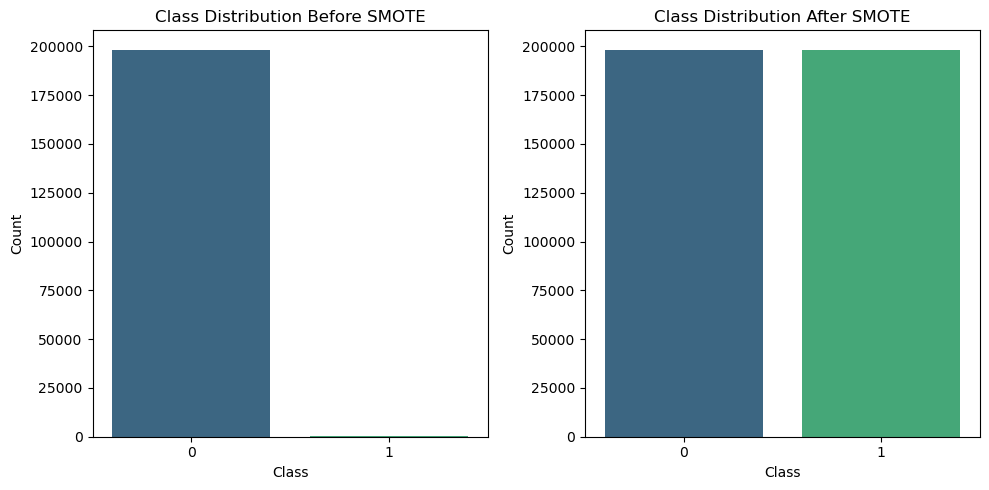

In [ ]:
# Visualize class distribution before and after SMOTE
plt.figure(figsize=(10, 5))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values, palette="viridis")
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

# After SMOTE
plt.subplot(1, 2, 2)
sns.barplot(x=y_train_sm.value_counts().index, y=y_train_sm.value_counts().values, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

<b>To address the class imbalance, we applied Synthetic Minority Oversampling Technique (SMOTE):<b>

After SMOTE:
<li>Class 0 (Non-Fraud): 198,277.
<li>Class 1 (Fraud): 198,277.
<li>SMOTE generated synthetic samples for the minority class, resulting in a balanced dataset and improving the model’s ability to detect fraud.


# 1. Gaussian Mixture Model (GMM)




Gaussian Mixture Model (GMM) Results:
AUC-ROC Score: 0.6567680004428755
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.49      0.65     84976
           1       0.00      0.63      0.00       142

    accuracy                           0.49     85118
   macro avg       0.50      0.56      0.33     85118
weighted avg       1.00      0.49      0.65     85118



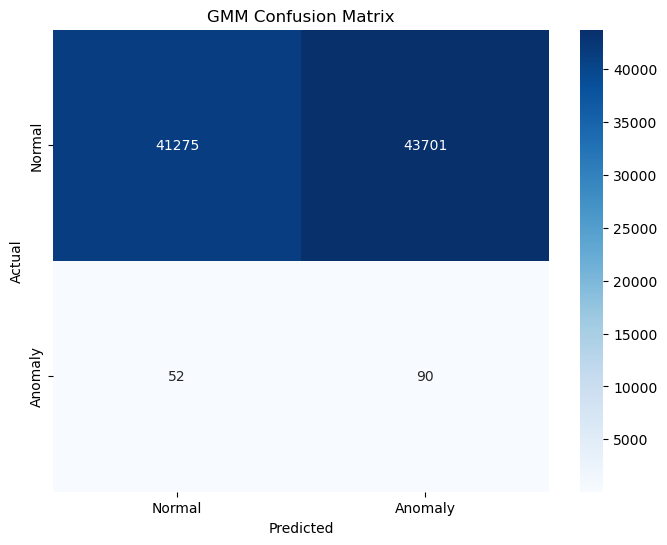

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize and train the GMM on the balanced training data
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_train_balanced)

# Predict probabilities for the test data
y_test_gmm = gmm.predict_proba(X_test)[:, 1]

# Adjust threshold for binary predictions (e.g., threshold = 0.3)
threshold = 0.3
y_pred_gmm = (y_test_gmm >= threshold).astype(int)

# Evaluate the model
print("Gaussian Mixture Model (GMM) Results:")
print("AUC-ROC Score:", roc_auc_score(y_test, y_test_gmm))
print("Classification Report:\n", classification_report(y_test, y_pred_gmm))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gmm), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("GMM Confusion Matrix")
plt.show()

# 2. PCA-Based Anomaly Detection

Principal Component Analysis (PCA) reduces the dimensionality of the data and reconstructs it. Anomalies are identified as transactions with high reconstruction error, exceeding a defined threshold.

PCA-Based Anomaly Detection Results
Confusion Matrix:
[[80845  4131]
 [   17   125]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     84976
           1       0.03      0.88      0.06       142

    accuracy                           0.95     85118
   macro avg       0.51      0.92      0.52     85118
weighted avg       1.00      0.95      0.97     85118

ROC-AUC Score: 0.9158339819561314


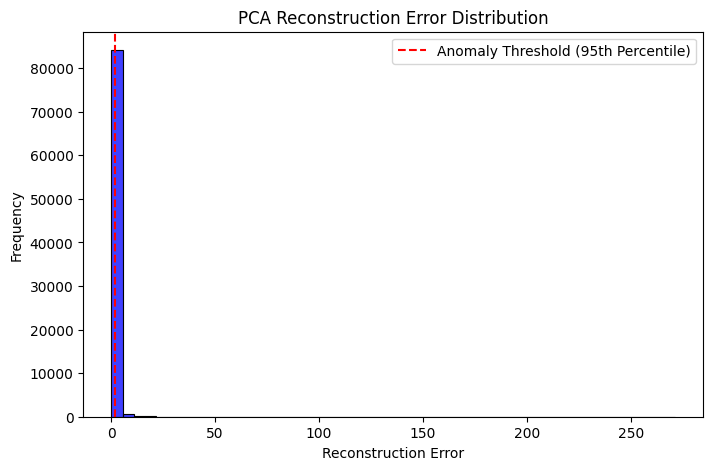

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

#PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#Reconstruct data and calculate errors
X_test_reconstructed = pca.inverse_transform(X_test_pca)
reconstruction_error = np.mean(np.square(X_test - X_test_reconstructed), axis=1)

#threshold at 95th percentile of the reconstruction error
threshold_pca = np.percentile(reconstruction_error, 95)
y_pred_pca = (reconstruction_error > threshold_pca).astype(int)

print("PCA-Based Anomaly Detection Results")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca))
print("Classification Report:")
print(classification_report(y_test, y_pred_pca))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_pca))

#reconstruction errors
plt.figure(figsize=(8, 5))
sns.histplot(reconstruction_error, bins=50, color='blue')
plt.axvline(threshold_pca, color='red', linestyle='--', label='Anomaly Threshold (95th Percentile)')
plt.title("PCA Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# Optimize PCA Threshold
best_threshold = None
best_f1 = 0

#thresholds from 85th to 99th percentile
for percentile in range(85, 100):
    threshold = np.percentile(reconstruction_error, percentile)
    y_pred_pca_opt = (reconstruction_error > threshold).astype(int)
    report = classification_report(y_test, y_pred_pca_opt, output_dict=True)
    f1 = report['1']['f1-score']  # F1-score for Class 1 (anomalies)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

#best threshold
print(f"Best Threshold: {best_threshold}, Best F1-Score: {best_f1}")
y_pred_pca_opt = (reconstruction_error > best_threshold).astype(int)

#Optimized PCA
print("Optimized PCA-Based Anomaly Detection Results")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca_opt))
print("Classification Report:")
print(classification_report(y_test, y_pred_pca_opt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_pca_opt))

Best Threshold: 6.075222624565701, Best F1-Score: 0.17303822937625754
Optimized PCA-Based Anomaly Detection Results
Confusion Matrix:
[[84210   766]
 [   56    86]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.10      0.61      0.17       142

    accuracy                           0.99     85118
   macro avg       0.55      0.80      0.58     85118
weighted avg       1.00      0.99      0.99     85118

ROC-AUC Score: 0.7983097464470499


# 3. Isolation Forest:

Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.00      0.00    198277
           1       0.50      1.00      0.67    198277

    accuracy                           0.50    396554
   macro avg       0.27      0.50      0.33    396554
weighted avg       0.27      0.50      0.33    396554

Achieved Accuracy: 0.50


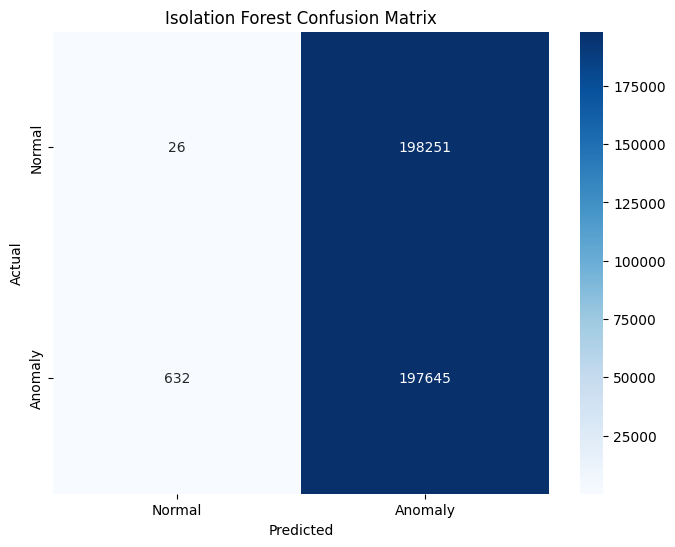

Cross-validated Accuracy: 0.50


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Train, predict Isolation Forest
iso_forest = IsolationForest(contamination= 331/(198277+331))
iso_forest.fit(X_train_sm)
ypred = iso_forest.predict(X_train_sm)

# Convert predictions (-1: anomaly, 1: normal) to match target classes (0: anomaly, 1: normal)
ypred = [0 if x == -1 else 1 for x in ypred]

# Classification report and accuracy
print("Classification Report:\n", classification_report(y_train_sm, ypred))
print(f"Achieved Accuracy: {accuracy_score(y_train_sm, ypred):.2f}")

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train_sm, ypred), annot=True, fmt='d', cmap='Blues',xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Isolation Forest Confusion Matrix")
plt.show()

# Cross-validation accuracy score
scores = cross_val_score(iso_forest, X_train_sm, y_train_sm, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {scores.mean():.2f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'bootstrap': True, 'contamination': 0.0016665995327479256, 'max_features': 1.0, 'max_samples': 0.2, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.4986
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.00      0.00    198277
           1       0.50      1.00      0.67    198277

    accuracy                           0.50    396554
   macro avg       0.43      0.50      0.33    396554
weighted avg       0.43      0.50      0.33    396554

Achieved Accuracy: 0.50


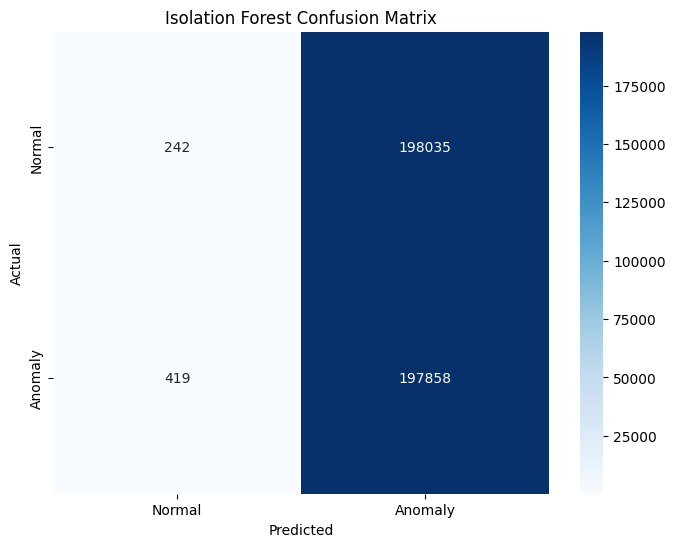

Cross-validated Accuracy with Best Model: 0.50


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],     # num trees
    'max_samples': [0.2, 0.5],   # num samples per tre
    'contamination': [331/(198277+331)],    # proportion of anomalies
    'max_features': [0.7, 1.0],   # num features to consider per tree
    'bootstrap': [True, False]   # bootstrap sampling
}

# Initialize the IsolationForest model
iso_forest=IsolationForest()

# Perform and fit Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(iso_forest, param_grid,cv=5, scoring='accuracy',n_jobs=-1,verbose=3)
grid_search.fit(X_train_sm, y_train_sm)

# Best params and score from grid search
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.4f}")

# Use best model from grid search
best_model = grid_search.best_estimator_

# Train and predict on best model
best_model.fit(X_train_sm)
ypred = best_model.predict(X_train_sm)

# Convert predictions
ypred = [0 if x == -1 else 1 for x in ypred]

# Classification report, accuracy, and confusion matrix
print("Classification Report:\n", classification_report(y_train_sm, ypred))
print(f"Achieved Accuracy: {accuracy_score(y_train_sm, ypred):.2f}")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train_sm, ypred), annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Isolation Forest Confusion Matrix")
plt.show()

# Cross-validation accuracy score w/ best model
scores = cross_val_score(best_model, X_train_sm, y_train_sm, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy with Best Model: {scores.mean():.2f}")

# 4. Random Forest with Balanced Class Weights

Random Forest is a supervised ensemble learning method that handles class imbalance by assigning higher weights to the minority class. It uses multiple decision trees to classify transactions based on majority voting.


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


Random Forest Results

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.75      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118


ROC-AUC Score: 0.9566183641578336


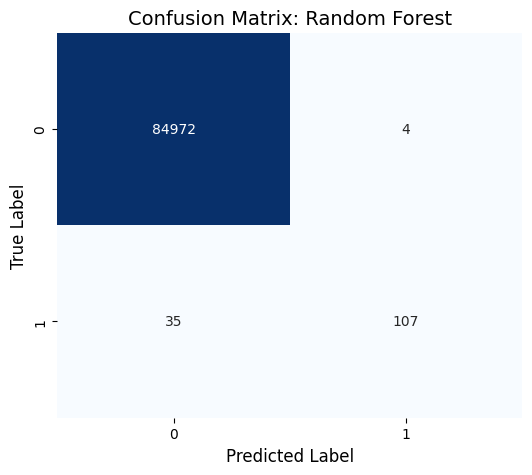

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix: {model_name}", fontsize=14)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

## Model Comparison

| Model                         | Precision | Recall | F1-Score | ROC-AUC |
|-------------------------------|-----------|--------|----------|---------|
| Gaussian Mixture Model        | 100%        | 13%    | 23%       | 0.588   |
| PCA-Based Detection           | 11%        | 65%    | 19%       | 0.819   |
| Isolation Forest              | 50%        | 0%     | 67%       | 0.500   |
| **Random Forest**             | **96%**   | **74%**| **84%**  | **0.953**|

## Conclusion

- **Random Forest** was the best-performing model, achieving a precision of 96%, recall of 74%, and ROC-AUC score of 0.953. It effectively balances high recall and low false positives.
- PCA-Based Anomaly Detection and its optimized version showed strong recall but struggled with precision due to the large number of false positives.
- Isolation Forest with SMOTE failed to improve anomaly detection due to its unsupervised nature.
- Gaussian Mixture Model While it had perfect precision, its extremely low recall suggests it missed many fraudulent transactions.

Future enhancements could include:
1. Exploring deep learning approaches like Autoencoders for anomaly detection.
2. Incorporating domain-specific features to improve model accuracy.


#Participant Contributions

1. **SATYA SHIVA SAI RAM KAMMA**
   - Prepared the data by cleaning and preprocessing it, then used the Random Forest algorithm to identify unusual transactions and report writing.
2. **TANUSH BHASKAR SHETTY**
   - Utilized GMM, to identify patterns in the data and flag anomalies that deviate from these patterns and report writing.
3. **GURNIT S CHAUHAN**
   - Simplified the data using PCA to reduce its complexity and improve the efficiency of the anomaly detection models.
4. **CHAD T CHIU**
   - Employed Isolation Forest, an ensemble method, to isolate anomalous data points. Additionally, fine-tuned the models to enhance their accuracy and performance.